In [1]:
import pandas as pd
import numpy as np
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [2]:
data_url = "https://goo.gl/ioc2Td"
gapminder = pd.read_csv(data_url)

gapminder.head(3)

,continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,...,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
0,Africa,Algeria,2449.008185,3013.976023,2550.816880,3246.991771,4182.663766,4910.416756,5745.160213,5681.358539,...,11000948.0,12760499.0,14760787.0,17152804.0,20033753.0,23254956.0,26298373.0,29072015.0,31287142,33333216
1,Africa,Angola,3520.610273,3827.940465,4269.276742,5522.776375,5473.288005,3008.647355,2756.953672,2430.208311,...,4826015.0,5247469.0,5894858.0,6162675.0,7016384.0,7874230.0,8735988.0,9875024.0,10866106,12420476
2,Africa,Benin,1062.752200,959.601080,949.499064,1035.831411,1085.796879,1029.161251,1277.897616,1225.856010,...,2151895.0,2427334.0,2761407.0,3168267.0,3641603.0,4243788.0,4981671.0,6066080.0,7026113,8078314


In [3]:
gapminder.shape

(142, 38)

In [4]:
gapminder.dtypes

continent          object
country            object
gdpPercap_1952    float64
gdpPercap_1957    float64
gdpPercap_1962    float64
gdpPercap_1967    float64
gdpPercap_1972    float64
gdpPercap_1977    float64
gdpPercap_1982    float64
gdpPercap_1987    float64
gdpPercap_1992    float64
gdpPercap_1997    float64
gdpPercap_2002    float64
gdpPercap_2007    float64
lifeExp_1952      float64
lifeExp_1957      float64
lifeExp_1962      float64
lifeExp_1967      float64
lifeExp_1972      float64
lifeExp_1977      float64
lifeExp_1982      float64
lifeExp_1987      float64
lifeExp_1992      float64
lifeExp_1997      float64
lifeExp_2002      float64
lifeExp_2007      float64
pop_1952          float64
pop_1957          float64
pop_1962          float64
pop_1967          float64
pop_1972          float64
pop_1977          float64
pop_1982          float64
pop_1987          float64
pop_1992          float64
pop_1997          float64
pop_2002            int64
pop_2007            int64
dtype: objec

Let us __filter__ the gapminder dataframe so that it contains __only life expectancy__ values. 

We use Pandas’ pattern matching str.contains to select the columns for life expectancy.

In [5]:
lifeExp = gapminder.loc[:, gapminder.columns.str.contains('^life|^c')]
#lifeExp = gapminder.loc[:, gapminder.columns.str.contains('^life')]
lifeExp.head()

,continent,country,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,Africa,Algeria,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,Africa,Angola,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,Africa,Benin,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728
3,Africa,Botswana,47.622,49.618,51.520,53.298,56.024,59.319,61.484,63.622,62.745,52.556,46.634,50.728
4,Africa,Burkina Faso,31.975,34.906,37.814,40.697,43.591,46.137,48.122,49.557,50.260,50.324,50.650,52.295


In [6]:
# For now let us also filter the data to contain countries from Africa and Europe.
lifeExp_AE = lifeExp[lifeExp.continent.isin(['Africa','Europe'])]
lifeExp_AE.shape

(82, 14)

In [7]:
# Let us store the country and continent information separate as meta data.
lifeExp_meta = lifeExp_AE.loc[:, lifeExp_AE.columns.str.contains('^c')]
lifeExp_meta.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


drop the country and continent columns. Now the dataframe contains life expectancy values for each year.

In [8]:
lifeExp_AE = lifeExp_AE.drop(columns=['continent', 'country'])
lifeExp_AE.head(n=3)

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,43.077,45.685,48.303,51.407,54.518,58.014,61.368,65.799,67.744,69.152,70.994,72.301
1,30.015,31.999,34.000,35.985,37.928,39.483,39.942,39.906,40.647,40.963,41.003,42.731
2,38.223,40.358,42.618,44.885,47.014,49.190,50.904,52.337,53.919,54.777,54.406,56.728


Before we actually perform SVD on our data set, let us mean center and scale so that each column of our data is on the same scale.

In [9]:
lifeExp_AE_scaled = (lifeExp_AE - lifeExp_AE.mean())/lifeExp_AE.std()
lifeExp_AE_scaled.head(n=6)

,lifeExp_1952,lifeExp_1957,lifeExp_1962,lifeExp_1967,lifeExp_1972,lifeExp_1977,lifeExp_1982,lifeExp_1987,lifeExp_1992,lifeExp_1997,lifeExp_2002,lifeExp_2007
0,-0.394065,-0.362388,-0.318266,-0.220089,-0.116843,0.020739,0.168041,0.426042,0.511124,0.581049,0.662703,0.673421
1,-1.364384,-1.377154,-1.391081,-1.408750,-1.438966,-1.491952,-1.619589,-1.767824,-1.619366,-1.591543,-1.517351,-1.505745
2,-0.754648,-0.757365,-0.744677,-0.722776,-0.714866,-0.699566,-0.704999,-0.714568,-0.575861,-0.526866,-0.543083,-0.474234
3,-0.056436,-0.070770,-0.076971,-0.074339,0.003176,0.127267,0.177719,0.241589,0.118080,-0.698043,-1.108032,-0.916405
4,-1.218785,-1.161611,-1.105007,-1.045569,-0.987659,-0.948784,-0.937109,-0.950112,-0.863548,-0.870069,-0.816108,-0.800924
5,-0.694625,-0.744390,-0.787656,-0.825826,-0.950521,-0.967314,-0.991424,-1.064156,-1.297870,-1.255277,-1.055259,-1.001007


#### Now we are all set to perform SVD on the gapminder life expectancy data from two continents. 

We use NumPy’s linalg module’s svd function to do SVD. In addition to the scaled data, we also specify “full_matrices=True” to get __all singular vectors__.

In [10]:
u, s, v = np.linalg.svd(lifeExp_AE_scaled, full_matrices=True)

The output of SVD is three matrices, u, s, and v. The matrices u and v are singular vectors and s is singular values. We can examine the dimensions of each with shape function.

In [11]:
print(u.shape)
print(s.shape)
print(v.shape)

(82, 82)
(12,)
(12, 12)


In [12]:
u

array([[ 0.01493955, -0.21234611,  0.10569186, ...,  0.14475593,
        -0.07521348,  0.17221942],
       [-0.17265594,  0.04623821, -0.07069646, ..., -0.05144835,
         0.20114062, -0.022498  ],
       [-0.07590623, -0.04577334,  0.00221011, ...,  0.06197953,
        -0.14951372,  0.15073811],
       ...,
       [ 0.16214209,  0.01105033, -0.03620287, ...,  0.91706271,
         0.04472956, -0.04171283],
       [ 0.0207029 , -0.16397981,  0.03447434, ...,  0.02909206,
         0.88113657,  0.0471575 ],
       [ 0.14735096,  0.0303275 , -0.06551876, ..., -0.04423799,
         0.06253062,  0.92285512]])

In [13]:
s

array([30.24364085,  6.22029408,  3.64162999,  1.73218438,  1.02337101,
        0.90383377,  0.50601323,  0.29280646,  0.26630751,  0.21192836,
        0.16923088,  0.13317875])

Singular values help us compute __variance explained__ by each singular vectors. 

We can visualize the percent variance explained by each singular vector or PC to understand the structure in the data

In [14]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained

array([0.941, 0.04 , 0.014, 0.003, 0.001, 0.001, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   ])

the Scree plot giving us the percentage of variance explained by each singular vector. We can see that the first vector explains most of the variation in the data.

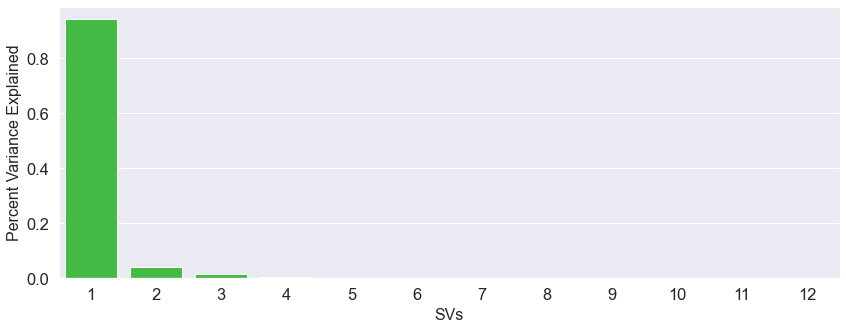

In [15]:
plt.figure(figsize=(14, 5))
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, 
            color="limegreen")


plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16);
#plt.savefig('svd_scree_plot.png',dpi=100)

Let us create a data frame containing the first two singular vectors (PCs) and the meta data for the data.

In [16]:
labels= ['SV'+str(i) for i in range(1,3)]

svd_df = pd.DataFrame(u[:, 0:2], 
                      index=lifeExp_meta["continent"].tolist(), 
                      columns=labels)

svd_df=svd_df.reset_index()

svd_df.rename(columns={'index':'Continent'}, inplace=True)
svd_df.head()

,Continent,SV1,SV2
0,Africa,0.014940,-0.212346
1,Africa,-0.172656,0.046238
2,Africa,-0.075906,-0.045773
3,Africa,-0.021360,0.189510
4,Africa,-0.111868,-0.052854


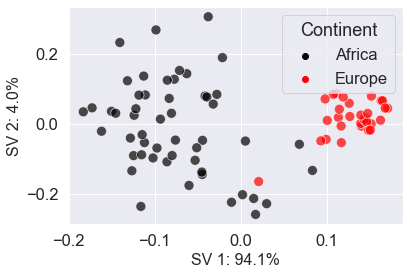

In [17]:
# specify colors for each continent
color_dict = dict({'Africa':'Black',
                   'Europe': 'Red'})

# Scatter plot: SV1 and SV2
sns.scatterplot(x="SV1", y="SV2", hue="Continent", 
                palette=color_dict, 
                data=svd_df, s=100,
                alpha=0.7)

plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100), fontsize=16)
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100), fontsize=16);

We can clearly see the difference in lifeExp between Africa and Europe as they nicely cluster together with a few exceptions.